In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
file_path = r'C:\Users\Wilky Martin\Documents\Chaos BPNN\Sorted_Exchange_Rates_CNY_to_IDR.xlsx'
data = pd.read_excel(file_path)
print(data.head(1475))

        NO  Value     Sell      Buy       Date
0     1474      1  2122.75  2101.72 2019-01-02
1     1473      1  2119.45  2098.47 2019-01-03
2     1472      1  2102.76  2081.77 2019-01-04
3     1471      1  2068.98  2048.25 2019-01-07
4     1470      1  2061.49  2041.02 2019-01-08
...    ...    ...      ...      ...        ...
1469     5      1  2240.40  2218.05 2024-12-23
1470     4      1  2224.87  2202.67 2024-12-24
1471     3      1  2231.74  2209.51 2024-12-27
1472     2      1  2237.54  2215.25 2024-12-30
1473     1      1  2225.26  2203.08 2024-12-31

[1474 rows x 5 columns]


In [17]:
df_selected_ = data[['Date', 'Sell']]
# Display the selected data
print(df_selected_.head(1475))

           Date     Sell
0    2019-01-02  2122.75
1    2019-01-03  2119.45
2    2019-01-04  2102.76
3    2019-01-07  2068.98
4    2019-01-08  2061.49
...         ...      ...
1469 2024-12-23  2240.40
1470 2024-12-24  2224.87
1471 2024-12-27  2231.74
1472 2024-12-30  2237.54
1473 2024-12-31  2225.26

[1474 rows x 2 columns]


In [18]:
df_selected_ = df_selected_.copy()
# Normalisasi kolom 'buy'
df_selected_['Sell'] = (df_selected_['Sell'] - df_selected_['Sell'].min()) / (df_selected_['Sell'].max() - df_selected_['Sell'].min())
df_selected_.head(1475)

,Date,Sell
0,2019-01-02,0.394741
1,2019-01-03,0.386523
2,2019-01-04,0.344962
3,2019-01-07,0.260845
4,2019-01-08,0.242193
...,...,...
1469,2024-12-23,0.687709
1470,2024-12-24,0.649036
1471,2024-12-27,0.666144
1472,2024-12-30,0.680587


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# --- Membuat dataset dengan windowing ---
window_size=3
X, y = [], []
values = df_selected_['Sell'].values

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)



X,y = create_dataset(values, window_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=0, shuffle=False)

# reshape input menjadi [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1029, 1, 3)
y_train shape: (1029,)
X_val shape: (221, 1, 3)
y_val shape: (221,)
X_test shape: (221, 1, 3)
y_test shape: (221,)


Epoch 1/1000


c:\Users\Wilky Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 0s - 10ms/step - loss: 0.1891 - val_loss: 0.0336
Epoch 2/1000
33/33 - 0s - 3ms/step - loss: 0.0278 - val_loss: 0.0107
Epoch 3/1000
33/33 - 0s - 3ms/step - loss: 0.0213 - val_loss: 0.0061
Epoch 4/1000
33/33 - 0s - 3ms/step - loss: 0.0180 - val_loss: 0.0049
Epoch 5/1000
33/33 - 0s - 4ms/step - loss: 0.0156 - val_loss: 0.0038
Epoch 6/1000
33/33 - 0s - 4ms/step - loss: 0.0135 - val_loss: 0.0033
Epoch 7/1000
33/33 - 0s - 3ms/step - loss: 0.0117 - val_loss: 0.0039
Epoch 8/1000
33/33 - 0s - 3ms/step - loss: 0.0100 - val_loss: 0.0031
Epoch 9/1000
33/33 - 0s - 3ms/step - loss: 0.0087 - val_loss: 0.0025
Epoch 10/1000
33/33 - 0s - 3ms/step - loss: 0.0076 - val_loss: 0.0023
Epoch 11/1000
33/33 - 0s - 3ms/step - loss: 0.0066 - val_loss: 0.0020
Epoch 12/1000
33/33 - 0s - 3ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 13/1000
33/33 - 0s - 3ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 14/1000
33/33 - 0s - 3ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 15/1000
33/33 - 0s - 3ms/step - los

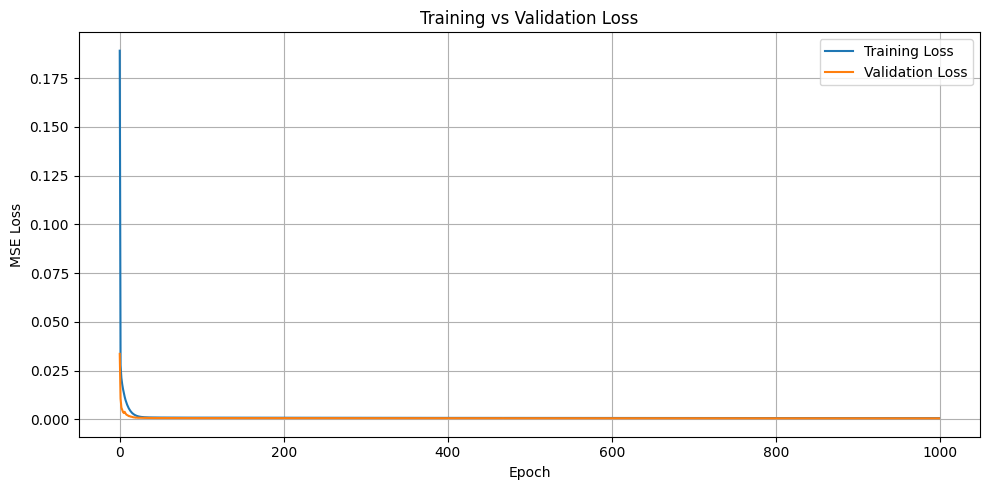

Current CPU Usage: 2.6%


In [ ]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras import layers
import psutil

def get_cpu_usage():
    usage_percent = psutil.cpu_percent()
    print(f"Current CPU Usage: {usage_percent}%")

s = time.process_time()#start time
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(window_size, 1),kernel_initializer="glorot_uniform",
    bias_initializer="zeros"),
    MaxPooling1D(pool_size=2,strides=1),
    Flatten(),
    Dense(1, activation='linear')
])

model.compile(keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# --- Training ---
epochs = 1000
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Ensure input shape is (samples, timesteps, features)
X_train = X_train.reshape((-1, window_size, 1))
X_val = X_val.reshape((-1, window_size, 1))
X_test = X_test.reshape((-1, window_size, 1))


history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=None,
    verbose=2,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

e = time.process_time()#end time\
print(f"{e - s} seconds")

# --- Plot Loss ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

get_cpu_usage()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Loss: 0.00039


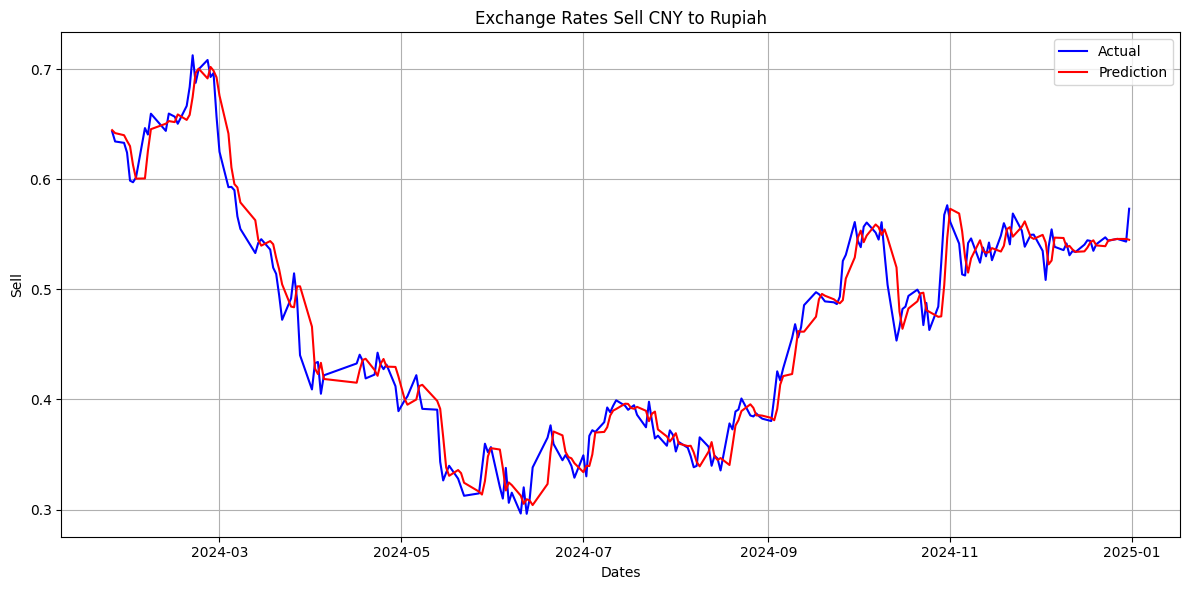

In [21]:
# Menggunakan model untuk memprediksi data testing
y_pred = model.predict(X_test)

# Menghitung test loss
test_loss = model.evaluate(X_test, y_test.T, verbose=0)
print(f"Test Loss: {test_loss:.5f}")



# Ambil tanggal sesuai panjang data test (tanpa shuffle)
date_test = df_selected_['Date'][-len(y_test):].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label="Actual", color="blue")
plt.plot(date_test, y_pred, label="Prediction", color="red")
plt.xlabel("Dates")
plt.ylabel("Sell")
plt.title("Exchange Rates Sell CNY to Rupiah")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()